<a href="https://colab.research.google.com/github/rokzeezee/PandasYouTubeSeries/blob/main/EXPLORATORY%20DATA%20ANALYSIS%20_ON%20_BMW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px


In [4]:
df=pd.read_csv("/content/bmw.csv")

In [6]:
df.shape

(10781, 9)

In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [8]:
df['model'].value_counts()

 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 6 Series     108
 Z4           108
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64

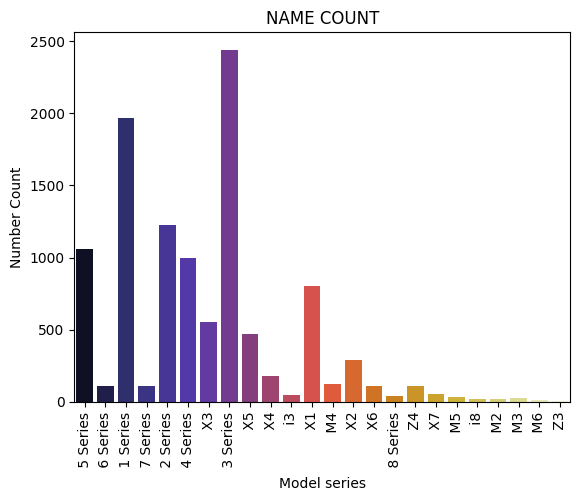

In [12]:
sns.countplot(data = df , x = "model" , palette="CMRmap" )
plt.xticks(rotation= 90)
plt.xlabel("Model series",fontsize=10,color="black")
plt.ylabel("Number Count",fontsize=10,color="black")
plt.title("NAME COUNT",color="black")
plt.show()

In [13]:
df['transmission'].value_counts()

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

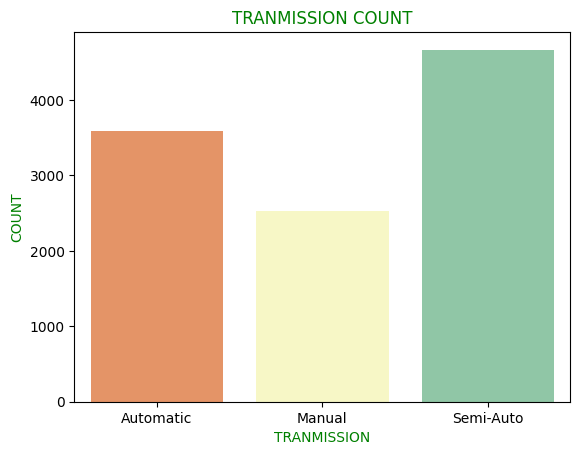

In [14]:
sns.countplot(data=df,x="transmission",palette="Spectral")
plt.xlabel("TRANMISSION",fontsize=10,color="GREEN")
plt.ylabel("COUNT",fontsize=10,color="GREEN")
plt.title("TRANMISSION COUNT",color="GREEN")
plt.show()

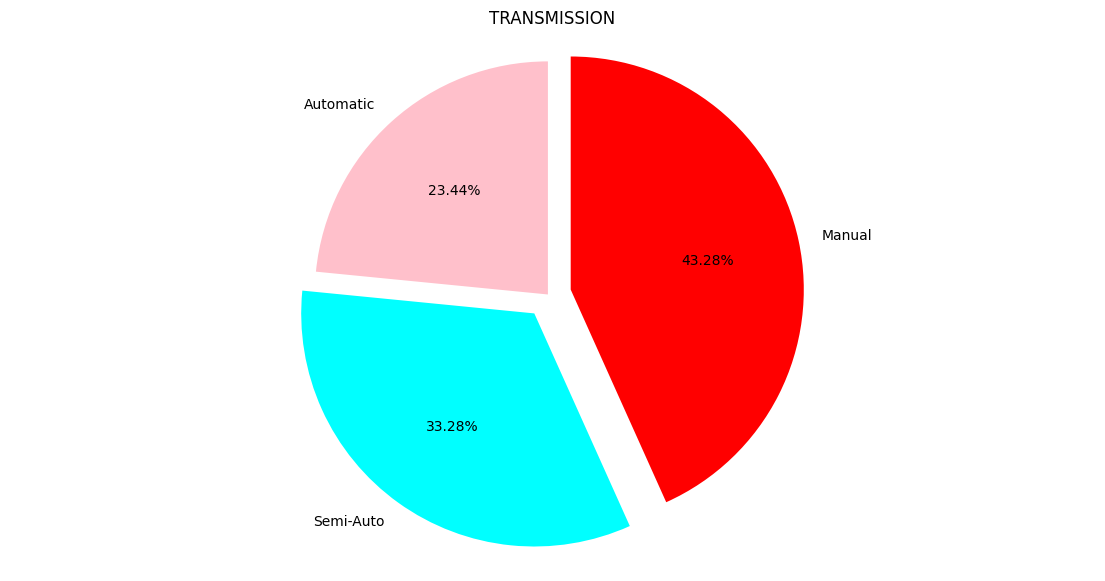

In [17]:
plt.figure(figsize=(14, 7))
labels=["Automatic","Semi-Auto", "Manual"]
plt.pie(df["transmission"].value_counts().sort_values(),labels=labels, explode=[0, 0.1, 0.1],autopct= '%1.2f%%',colors=['pink','cyan' , "red" , "green"], startangle=90)
plt.title('TRANSMISSION')
plt.axis('equal')
plt.show()

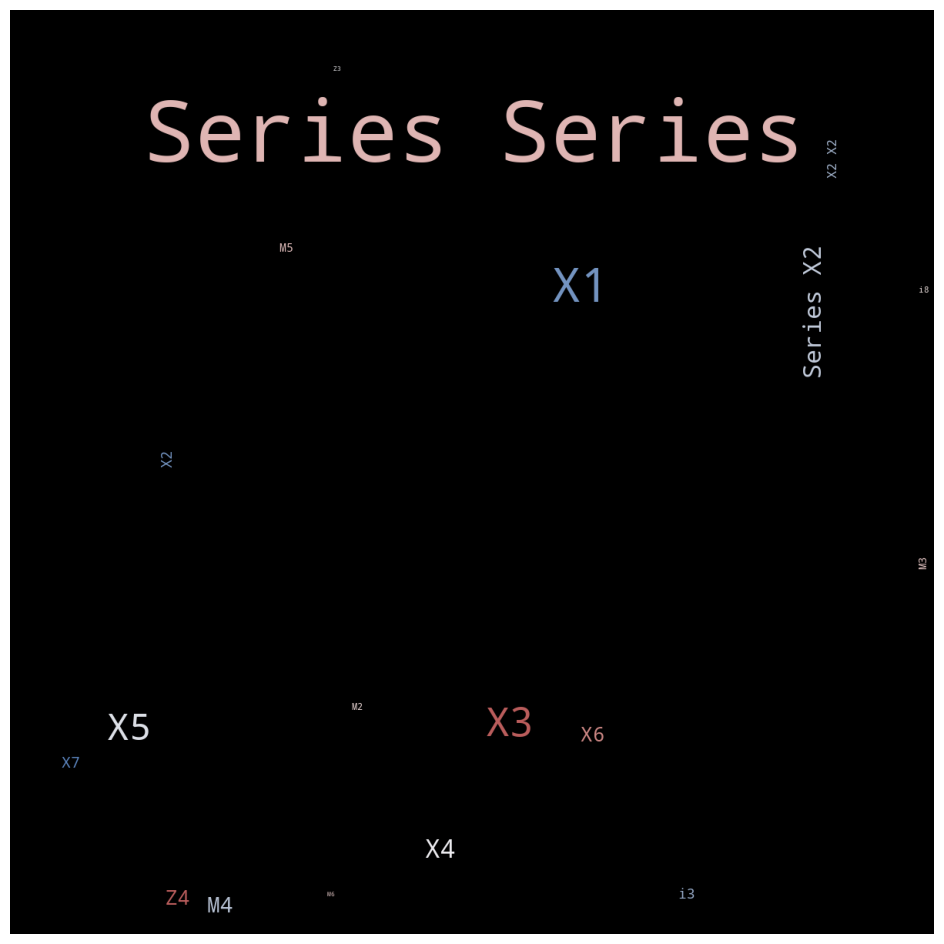

In [18]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['model'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

In [19]:
df["year"].value_counts()

2019    3485
2016    1882
2017    1721
2015     922
2018     848
2020     733
2014     501
2013     357
2012     119
2011      51
2010      41
2009      30
2008      23
2007      16
2006      14
2004      12
2002       6
2005       6
1999       4
2001       3
2003       2
2000       2
1996       1
1997       1
1998       1
Name: year, dtype: int64

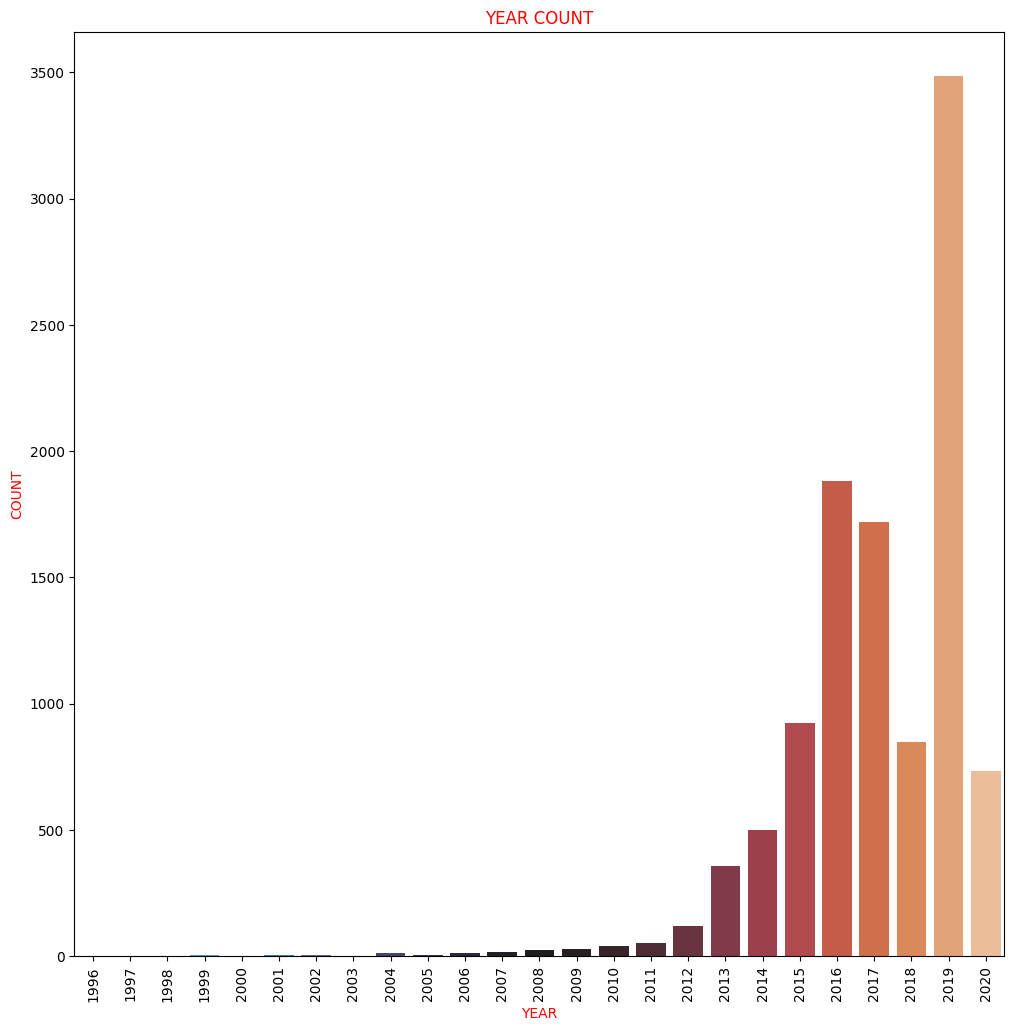

In [20]:
sns.countplot(data=df,x="year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=10,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("YEAR COUNT",color="RED")
plt.show()

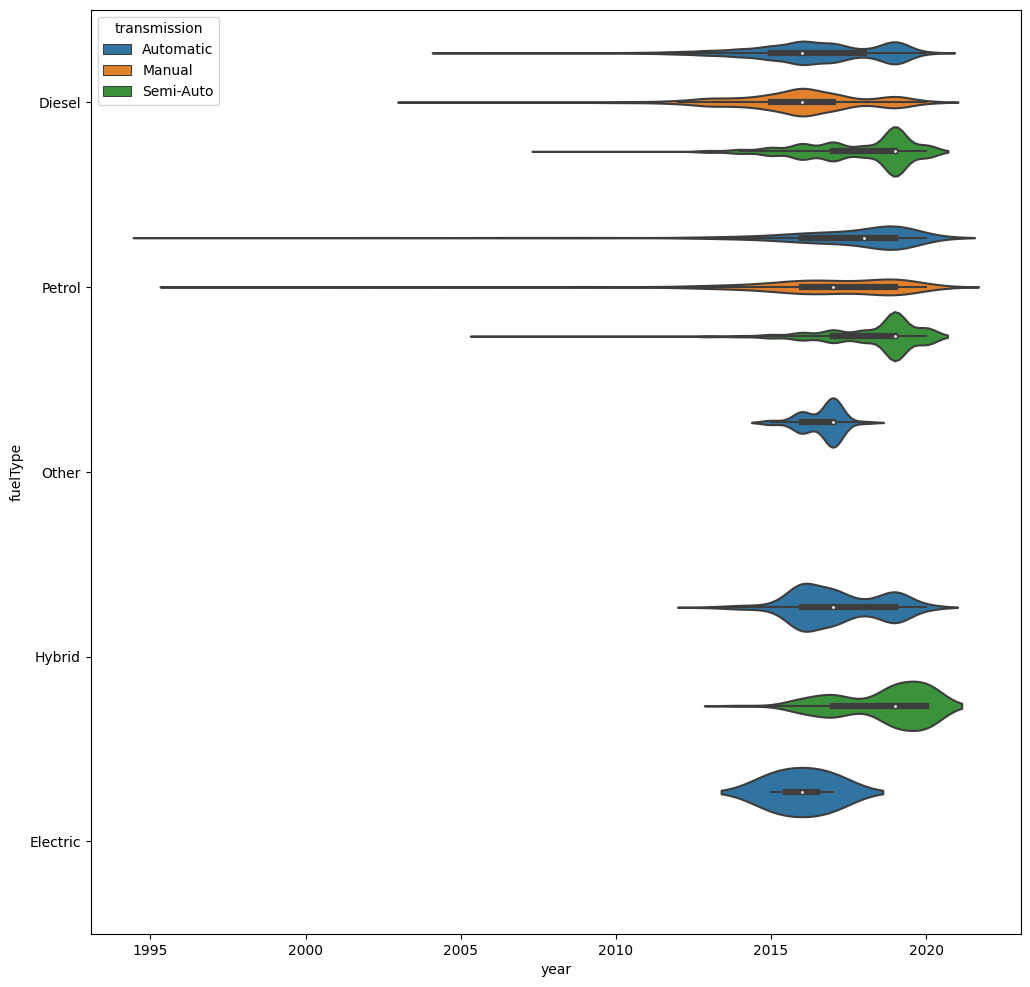

In [21]:
sns.violinplot(data=df, x="year", y="fuelType",hue="transmission")
plt.show()

In [24]:
fig =px.sunburst(df,path=['year',"model"],values='mpg')

fig.show()

In [25]:
joint_data=df.sort_values(by='year', ascending=False)

top_rated=joint_data[:2500]
fig =px.sunburst(
    top_rated,
    path=['year',"model"],
    values='year',
    color='year')
fig.show()

In [26]:
joint_data=df.sort_values(by='year', ascending=False)

top_rated=joint_data[2500:]
fig =px.sunburst(
    top_rated,
    path=['year',"model"],
    values='year',
    color='year')
fig.show()

<ipython-input-27-0b24a9163c84>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



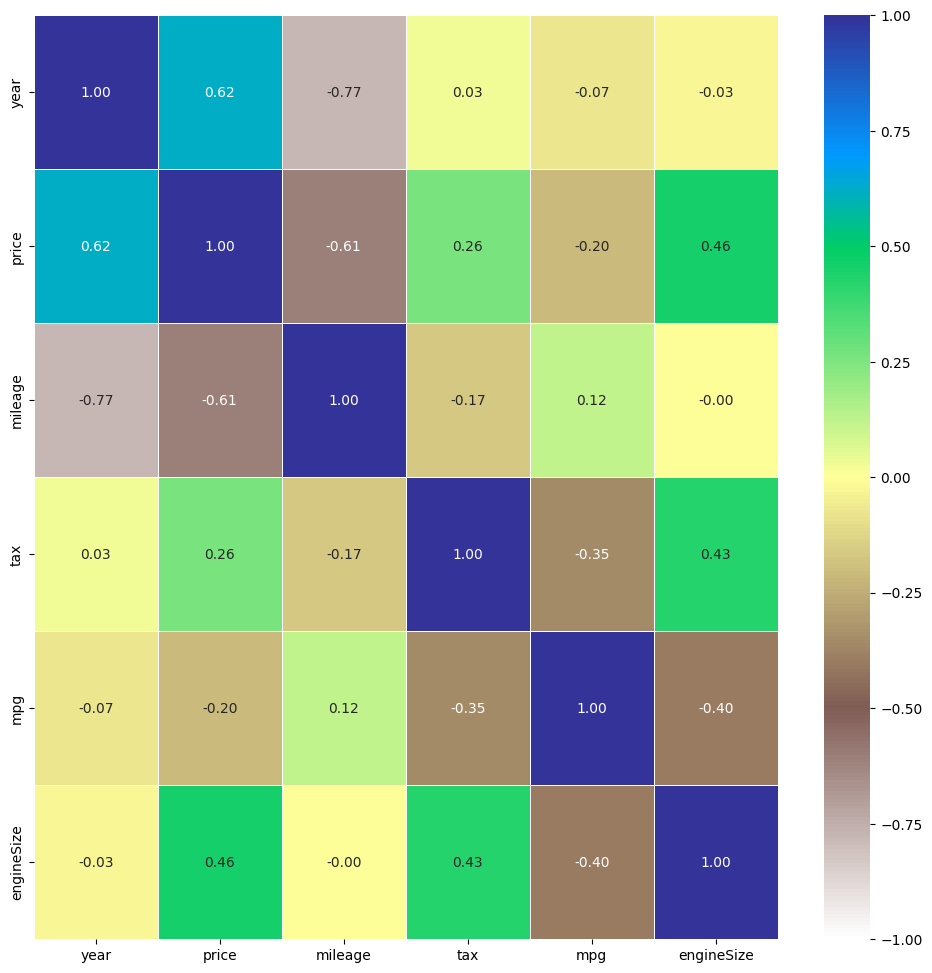

In [27]:
fig, ax = plt.subplots(figsize=(12,12))
corr1   = df.corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='terrain_r', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.show()

In [28]:
fig = px.strip(df , x= "year" , y="model", color = "model" , facet_col= "engineSize")

fig.show()

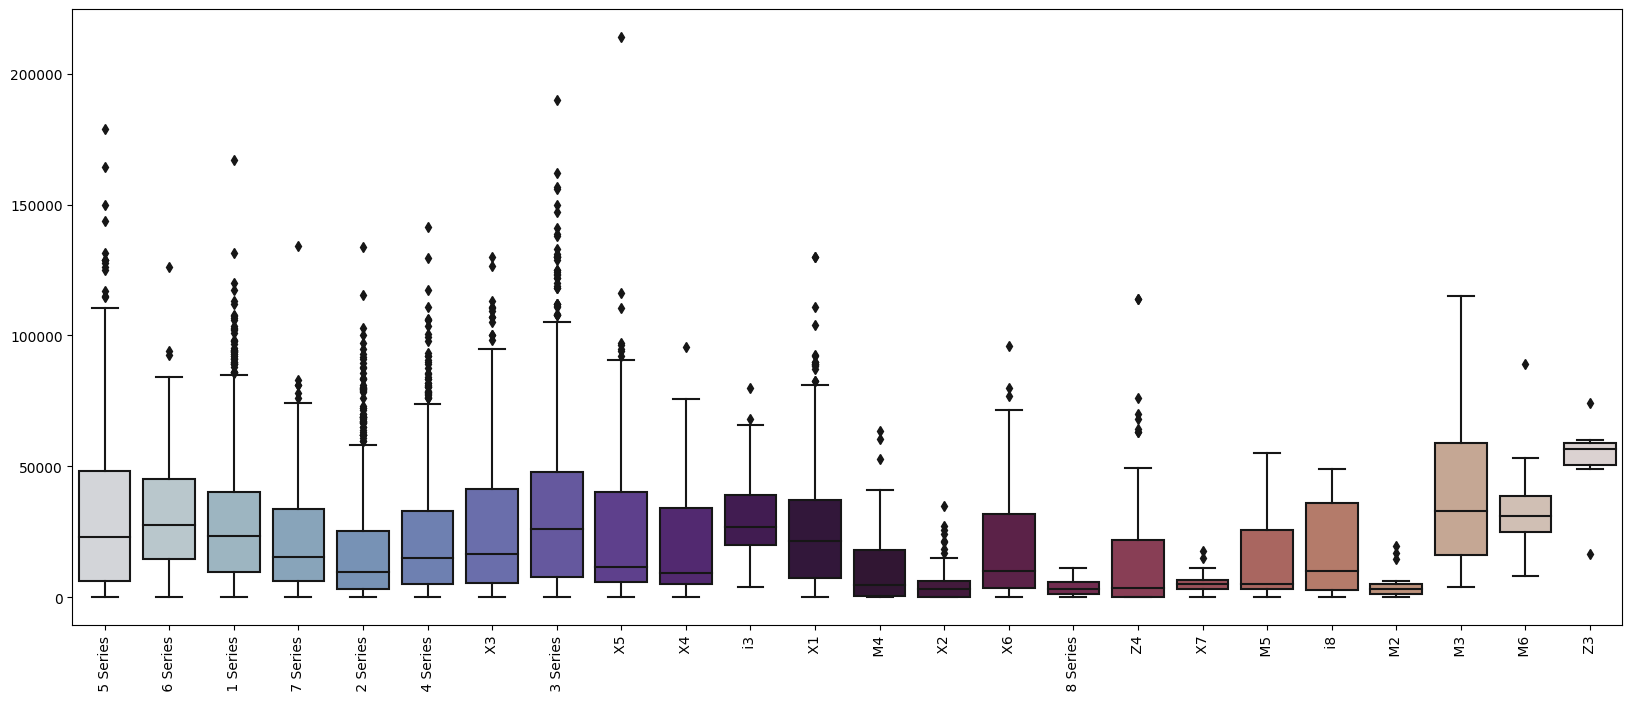

In [29]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df["model"].values, y = df["mileage"].values,palette="twilight",ax=ax)
plt.xticks(rotation=90)
plt.show()